In [2]:
%run -i setup.py

## Histogram Test

We expect a histogram to be pretty simple, and not require a lot of manipulation of our data. We are using one series of numeric data with no groupings, filters, or facets.

### Matplotlib


AttributeError: Rectangle.set() got an unexpected keyword argument 'c'

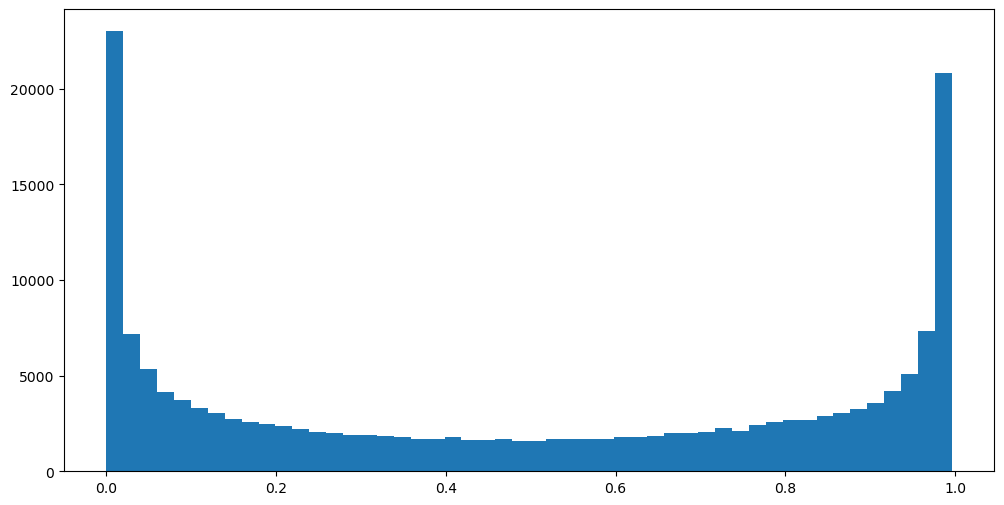

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(dataset.acousticness, 50)
#print('N, bins,patches',n, bins, patches)
ax.hist(dataset.acousticness, 50)
ax.set_xlabel('Acousticness')
ax.set_title('Histogram of Acousticness')
ax.grid(False)
plt.show()

### Seaborn

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

with sns.axes_style("whitegrid"):
    viz = sns.histplot(data=dataset, x="acousticness",  binwidth=.02, ax=ax)
    viz.set_title("Histogram of Acousticness")
    viz.set_xlabel('Acousticness')
    viz

### Bokeh

Must specify whether output is for notebook or file. Rendering is resource heavy and takes some time. Tool will not do bins for you, must create numpy object first. This approach is actually creating rectangles to pretend it is a histogram.

In [ ]:
output_notebook()
hist, edges = np.histogram(dataset.acousticness, bins=50)

p = figure(title="Histogram of Acousticness", 
           y_axis_label='Count', 
           x_axis_label='Acousticness', 
           width=750, 
           height = 400)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])
show(p)

### Altair

Tool cannot handle the full complement of data, must limit to < 5000 rows. Returns very beautiful graphs. Layering elements on to object, can return without using `show`.

In [ ]:
source = dataset.sample(axis = 0, n=4000)

viz = alt.Chart(source)
viz = viz.mark_bar()
viz = viz.encode(alt.X("acousticness", bin=True),y='count()')
viz = viz.properties(title='Histogram of Acousticness').properties(width=700, height=300)

viz


### Plotnine

Emulates the ggplot grammar from R. May not feel "pythonic" if you like the layering approach.

In [ ]:
pno.dpi = (150)
pno.figure_size = (6,3)
ggplot(data=dataset, mapping=aes(x='acousticness')) + \
    theme_bw(base_size = 6) + \
    geom_histogram(color='white', fill = 'darkblue', bins=50) + \
    labs(title = "Histogram of Acousticness")

### Plotly

Create base object and set many traits with one call. Changing style can be handled in mostly one command. Highly interactive, renders faster than bokeh. Not very beautiful default image.

Here we can use Plotly Express with reasonable results.

In [ ]:
fig = px.histogram(dataset, \
                   x="acousticness", \
                   nbins=50, \
                   title="Histogram of Acousticness",\
                   template='plotly_white')

fig.update_layout(
    width=700,height=400,
    margin=dict(l=15,r=25,b=15,t=40,pad=1))
fig.show()


## Histogram Results

Unscientific rankings by me, 1 = best, 6 = worst.


|            |features     |beauty    |ease of use   |
|------------|-------------|----------|--------|
|matplotlib  |   4         |   6      |   5    |
|seaborn     |   3         |   4      |   1    |
|bokeh       |   5         |   2      |   6    |
|altair      |   6         |   1      |   4    |
|plotnine    |   2         |   3      |   3    |
|plotly      |   1         |   5      |   2    |

